## RNSA ROI detector - yolov5 - training part

1.     Labelled 300 images (taken from competion train DS)
1.     Trained Yolov5 1024 im size as input
1.     Validated model_1 (on all images in competion train DS - ~56.000 images) and check missed images - relabeled missed images (50 images - most characteristic patterns). Add new labeled data to train and valid (check to prevent from leak - I was looking on patient_id) - 350 images
1.     Trained Yolov5 again
1.     Validated model_2 and check missed images (model_2 improved a lot) - relabeled missed images (50). Add new labeled data to train and valid- 400 images in yolo DS
1.     Trained Yolov5 again -> model_3 (it performed very well).


Dataset created using yolo ROI extractor: https://www.kaggle.com/datasets/remekkinas/rsna-breast-cancer-detection-poi-images

In [1]:
%%capture 

!git clone https://github.com/ultralytics/yolov5
    
%cd yolov5
!wandb disabled

In [2]:
!python train.py --img 1024\
--batch 24\
--epochs 50\
--data /kaggle/input/rsna-roi-detector-annotations-yolo/rsna_annotations/yolo_ds/data.yaml\
--hyp /kaggle/input/rsna-roi-detector-annotations-yolo/hyp.bre.yaml --weights yolov5n6.pt

train: weights=yolov5n6.pt, cfg=, data=/kaggle/input/rsna-roi-detector-annotations-yolo/rsna_annotations/yolo_ds/data.yaml, hyp=/kaggle/input/rsna-roi-detector-annotations-yolo/hyp.bre.yaml, epochs=50, batch_size=24, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirement "thop>=0.1.1" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5

In [3]:
!python detect.py --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt\
--img 1024\
--conf 0.5\
--source /kaggle/input/rsna-roi-detector-annotations-yolo/roi_samples/roi_samples

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/rsna-roi-detector-annotations-yolo/roi_samples/roi_samples, data=data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 206 layers, 3087256 parameters, 0 gradients, 4.2 GFLOPs
image 1/30 /kaggle/input/rsna-roi-detector-annotations-yolo/roi_samples/roi_samples/10680_1857690035.png: 1024x832 1 ROI, 13.6ms
image 2/30 /kaggle/input/rsna-roi-detector-annotations-yolo/roi_samples/roi_samples/10724_1780729993.png: 1024x832 1 ROI, 9.7ms
image 3/

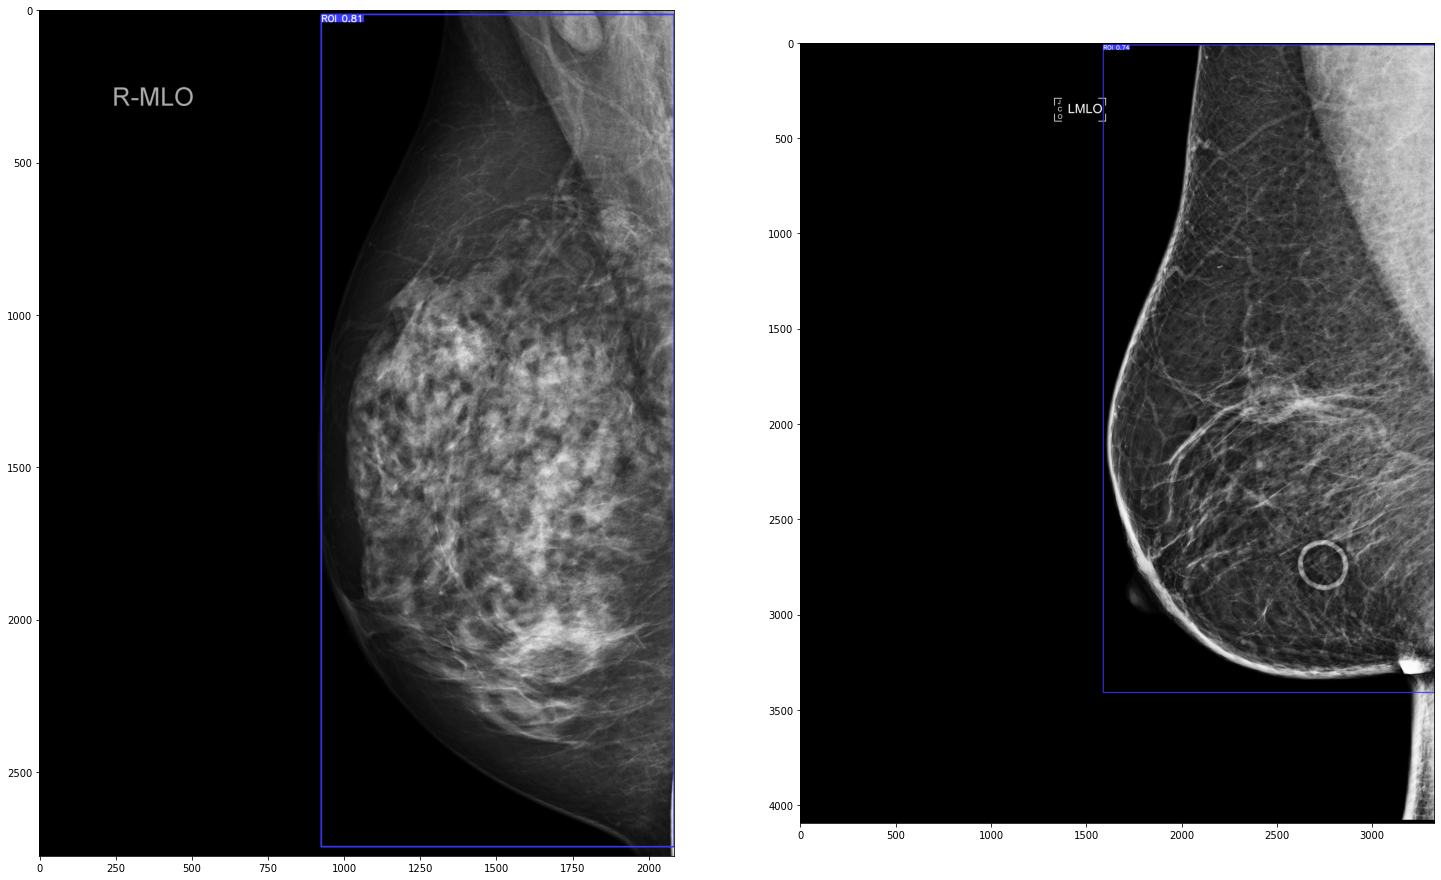

In [4]:
import cv2
import glob 
import random
from matplotlib import pyplot as plt

n = 2
out_files = glob.glob("/kaggle/working/yolov5/runs/detect/exp/*.png")

fig, axs = plt.subplots(1, n, figsize=(25, 25))
for idx, im_file in enumerate(random.sample(out_files, n)):
    im = cv2.imread(im_file)
    axs[idx].imshow(im)
plt.show()